# Basic function fitting

Here we review the two most simple function fit: the linear fit, which can be done by hand (least square method), and the polynomial fit, which is just a variation and has dedicated numpy function that can be used to do the work.

In [1]:
# awojdyla@lbl.gov, July 2020

## Linear fit

We'll do a linear fit based on least square method. We do this from scratch, but most packages with linear fit are implemented mostly in the same way.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# defining an arbitrary line to fit
x = np.linspace(-1,2,10)
a = 3
b = 5
y = a*x+b

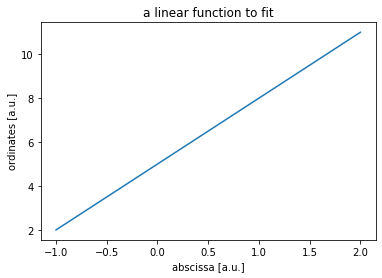

In [4]:
plt.plot(x,y)
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.show()

##### Least square fit

In [5]:
# The wikipedia page is incredibly obscure:
# https://en.wikipedia.org/wiki/Linear_least_squares

N = len(x)
xx = x*x
xy = x*y

# recovered least square coefficients
a_ls = (N*np.sum(x*y) - np.sum(x)*np.sum(y))/(N*np.sum(x*x)-np.sum(x)**2)
b_ls = (np.sum(y) - a_ls*np.sum(x))/N

# the fitted function
y_ls = a_ls*x + b_ls

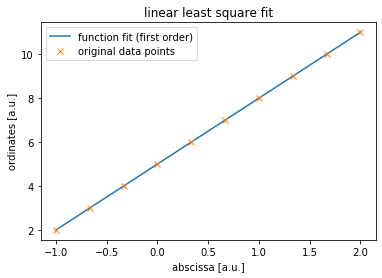

In [6]:
plt.plot(x,y_ls,x,y_ls,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('linear least square fit')
plt.legend(('function fit (first order)','original data points'))
plt.show()

While simplistic function fitting might not cut it in all cases, it is often to resort to these simple case by linearizing the function to fit!

### Polynomial fitting with numpy

In [7]:
# We'll create a arbitrary second order polynomial
x2 = np.linspace(-1,2,10)
c2 = 4
c1 = 0.2
c0 = 2
y2 = c2*x2**2 + c1*x2**1 + c0 

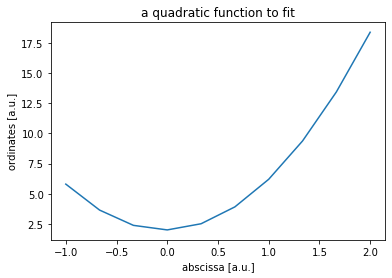

In [8]:
plt.plot(x2,y2)
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a quadratic function to fit')
plt.show()

In [9]:
fit_degree = 2
p2 = np.polyfit(x2,y2, fit_degree)

In [10]:
# the coeffecients of the fit are stored into p2 (descending order)
print(p2)
# compare with the original coefficients c2,c1, c0

[4.  0.2 2. ]


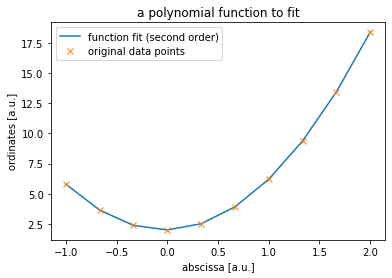

In [11]:
# it is possible to quickly look at the retrieved polynomial 
y2f = np.polyval(p2,x2)
plt.plot(x2,y2f,x2,y2,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a polynomial function to fit')
plt.legend(('function fit (second order)','original data points'))
plt.show()

quadratic (second order)  fit is often useful to determine the true maximum or zeros of a function (there's a closed-form soluation as soon as you have the polynomial coefficients). It often does a much better job than `np.amax` ,since it provides a linear interpolation of the maximum.

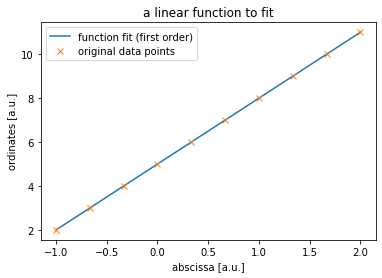

In [12]:
# You can also do a line fit by setting the fit degree to 1
p = np.polyfit(x,y, 1)
yf = np.polyval(p,x)
plt.plot(x,yf,x,y,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.legend(('function fit (first order)','original data points'))
plt.show()

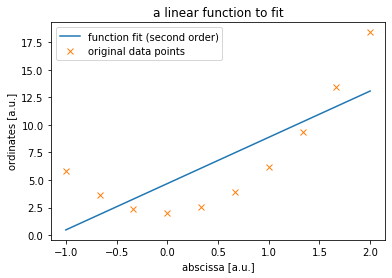

In [13]:
# You can fit a polynomial of arbitrary order with a fit of arbitrary order
p1 = np.polyfit(x2,y2, 1)
y1f = np.polyval(p1,x)
plt.plot(x,y1f,x2,y2,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.legend(('function fit (second order)','original data points'))
plt.show()

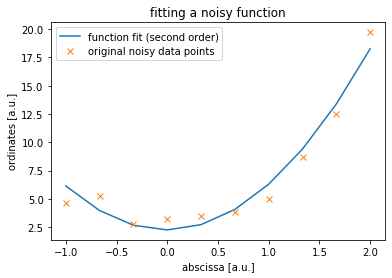

In [14]:
# There's more fun if you add noise to the data!

# adding noise (gaussian noise)
noise_amplitude_au = 1
y2n = y2 + np.random.randn(len(y2))* noise_amplitude_au

# fitting the noise data y2n
p2n = np.polyfit(x2,y2n,2)

y2nf = np.polyval(p2n,x2)
plt.plot(x2,y2nf,x2,y2n,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('fitting a noisy function')
plt.legend(('function fit (second order)','original noisy data points'))
plt.show()

## Practical use of first and second order fit

### 1. Retrieve a parameter

### 2. Find the position of a peak

### 3. Find a zero-crossing 